In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import glob
import matplotlib.pyplot as plt
# Keras API
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
train_dir ="../input/plantvillages/PlantVillage/train"
test_dir="../input/plantvillages/PlantVillage/val"

In [2]:
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count

In [3]:
train_samples =get_files(train_dir)
num_classes=len(glob.glob(train_dir+"/*"))
test_samples=get_files(test_dir)
print(num_classes,"Classes")
print(train_samples,"Train images")
print(test_samples,"Test images")

39 Classes
44016 Train images
11004 Test images


In [4]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   validation_split=0.2,
                                   horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [5]:
img_width,img_height =256,256
input_shape=(img_width,img_height,3)
batch_size =32

train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size,
                                                   shuffle=True,
                                                   subset='training')
test_generator=test_datagen.flow_from_directory(test_dir,shuffle=True,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)

Found 35229 images belonging to 39 classes.
Found 11004 images belonging to 39 classes.


In [7]:
train_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [8]:
model = Sequential()
model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))          
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 252, 252, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 84, 84, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 82, 82, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 41, 41, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 39, 39, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 23104)             0

In [9]:
model_layers = [ layer.name for layer in model.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'flatten', 'dense', 'dropout', 'dense_1', 'dense_2']


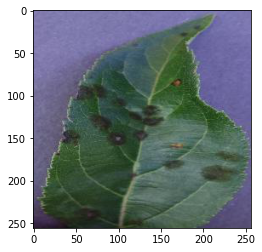

In [10]:
from keras.preprocessing import image
import numpy as np
img1 = image.load_img('../input/plantvillages/PlantVillage/train/Apple___Apple_scab/01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003.JPG')
plt.imshow(img1);

#preprocess image
img1 = image.load_img('../input/plantvillages/PlantVillage/train/Apple___Apple_scab/01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003.JPG', target_size=(256, 256))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

In [15]:
from keras.models import Model
conv2d_output = Model(inputs=model.input, outputs=model.get_layer('conv2d').output)
max_pooling2d_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d').output)
conv2d_1_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_1').output)
max_pooling2d_1_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_1').output)
conv2d_2_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_2').output)
max_pooling2d_2_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_2').output)
flatten_output = Model(inputs=model.input,outputs=model.get_layer('flatten').output)
conv2d_features = conv2d_output.predict(img)
max_pooling2d_features = max_pooling2d_output.predict(img)
conv2d_1_features = conv2d_1_output.predict(img)
max_pooling2d_1_features = max_pooling2d_1_output.predict(img)
conv2d_2_features = conv2d_2_output.predict(img)
max_pooling2d_2_features = max_pooling2d_2_output.predict(img)
flatten_features = flatten_output.predict(img)

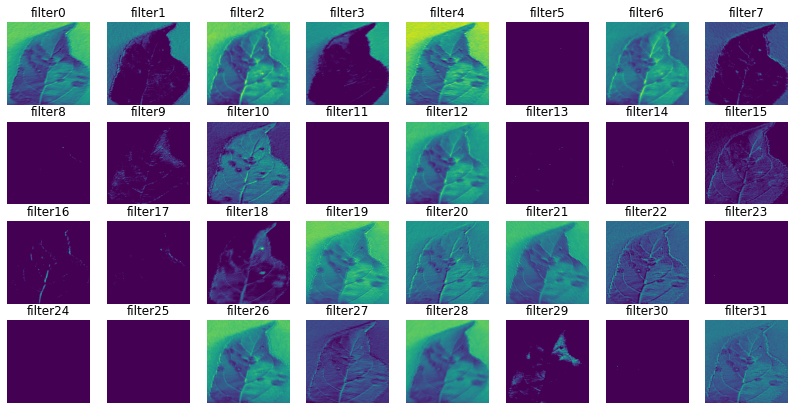

In [16]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_features[0, :, :, i], cmap='viridis')
plt.show()

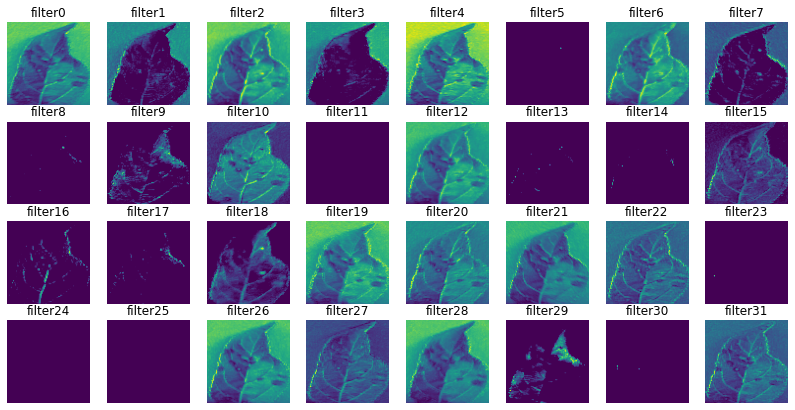

In [17]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_features[0, :, :, i], cmap='viridis')
plt.show()

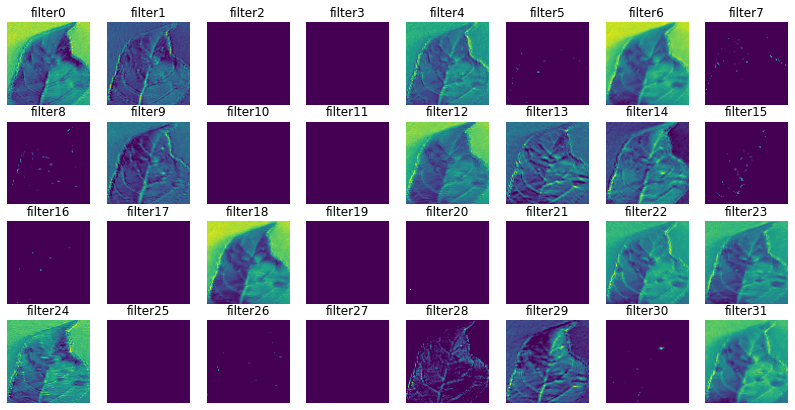

In [18]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_1_features[0, :, :, i], cmap='viridis')
plt.show()

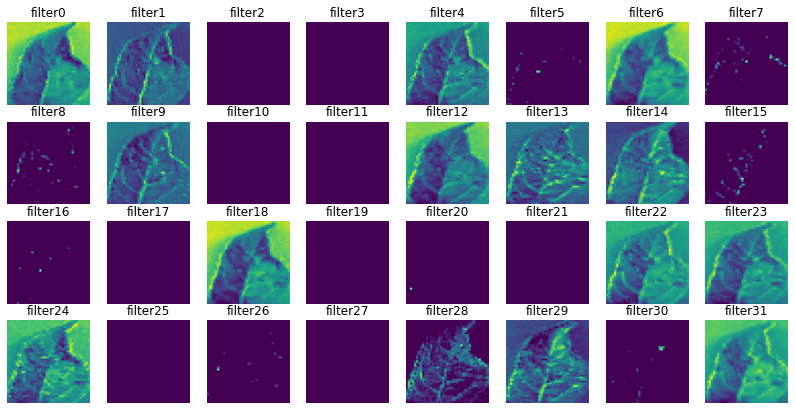

In [19]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_1_features[0, :, :, i], cmap='viridis') 
plt.show()

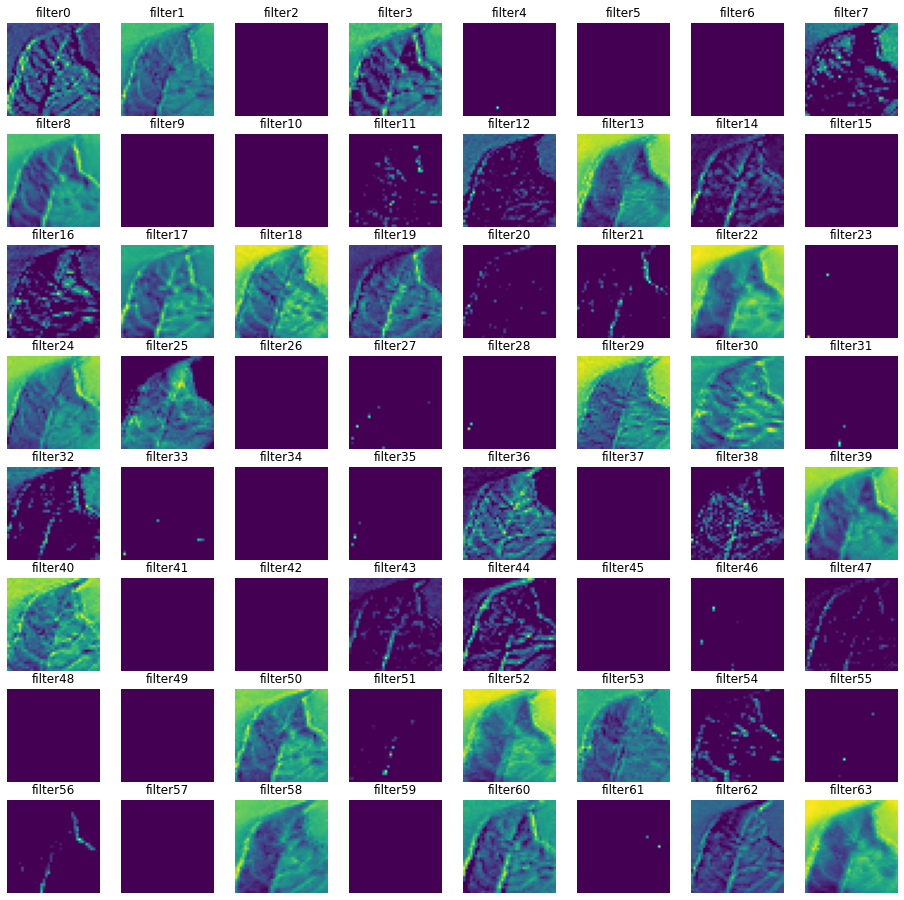

In [20]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(16,16))
columns =8 
rows = 8
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_2_features[0, :, :, i], cmap='viridis')
plt.show()

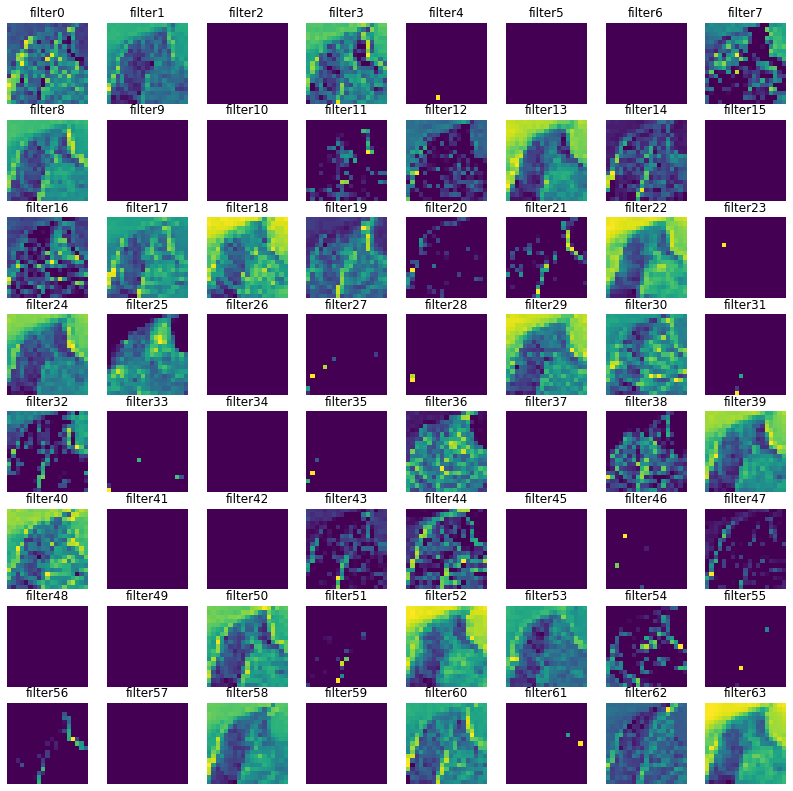

In [21]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,14))
columns = 8
rows = 8
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_2_features[0, :, :, i],cmap='viridis')
plt.show()

In [22]:
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True,
    subset='validation')

Found 8787 images belonging to 39 classes.


In [23]:
opt=keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
train=model.fit_generator(train_generator,
                          epochs=30,
                          steps_per_epoch=train_generator.samples // batch_size,
                          validation_data=validation_generator,
                          validation_steps= validation_generator.samples// batch_size,verbose=1)

Epoch 1/30
1100/1100 [==============================] - 687s 624ms/step - loss: 2.0449 - accuracy: 0.4460 - val_loss: 0.6949 - val_accuracy: 0.7791
Epoch 2/30
1100/1100 [==============================] - 594s 540ms/step - loss: 0.6845 - accuracy: 0.7864 - val_loss: 0.4330 - val_accuracy: 0.8612
Epoch 3/30
1100/1100 [==============================] - 584s 531ms/step - loss: 0.4783 - accuracy: 0.8494 - val_loss: 0.3527 - val_accuracy: 0.8906
Epoch 4/30
1100/1100 [==============================] - 612s 556ms/step - loss: 0.3806 - accuracy: 0.8778 - val_loss: 0.2833 - val_accuracy: 0.9110
Epoch 5/30
1100/1100 [==============================] - 614s 558ms/step - loss: 0.3036 - accuracy: 0.9018 - val_loss: 0.3360 - val_accuracy: 0.8934
Epoch 6/30
1100/1100 [==============================] - 626s 569ms/step - loss: 0.2836 - accuracy: 0.9079 - val_loss: 0.2636 - val_accuracy: 0.9146
Epoch 7/30
1100/1100 [==============================] - 588s 534ms/step - loss: 0.2506 - accuracy: 0.9180 - val_

In [41]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
Y_pred = model.predict_generator(test_generator, test_generator.samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred[0])


12


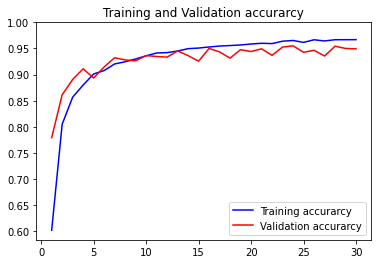

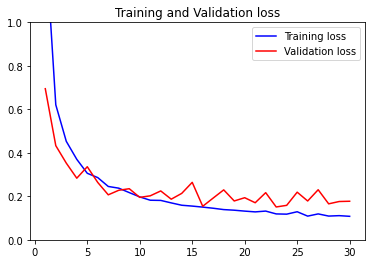

In [24]:
acc = train.history['accuracy']
val_acc = train.history['val_accuracy']
loss = train.history['loss']
val_loss = train.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.ylim([0,1.0])
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [26]:
score,accuracy =model.evaluate(test_generator,verbose=1)
print("Test score is {}".format(score))
print("Test accuracy is {}".format(accuracy))

344/344 [==============================] - 80s 234ms/step - loss: 0.1773 - accuracy: 0.9519
Test score is 0.17734089493751526
Test accuracy is 0.951926589012146


In [46]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

img_width=256
img_height=256

y_true = []
y_pred = []
y_true2 = []
for i in range(test_generator.n // batch_size):
  images,labels = test_generator[i]
  preds = model.predict_classes(images)
  y_true.extend(labels)
  
  y_pred.extend([pred] for pred in preds)

for x in y_true:
    coun=0
    for k in x:
        if k == 1.0:
            y_true2.extend([[coun]])
            break
        else:
            coun += 1

conf_matrix = str(confusion_matrix(y_true=y_true2,y_pred=y_pred))
report = str(classification_report(y_true=y_true2,y_pred=y_pred,target_names=test_generator.class_indices))
print(conf_matrix)
print(report)

[[102   0   1 ...   0   0   0]
 [  1 120   0 ...   0   0   0]
 [  1   0  48 ...   0   0   0]
 ...
 [  0   0   0 ...  69   0   0]
 [  0   0   0 ...   0 317   0]
 [  0   0   0 ...   0   0 134]]
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.91      0.81      0.86       126
                                 Apple___Black_rot       0.98      0.96      0.97       125
                          Apple___Cedar_apple_rust       0.96      0.89      0.92        54
                                   Apple___healthy       0.96      0.95      0.95       329
                               Blueberry___healthy       0.97      0.98      0.97       299
          Cherry_(including_sour)___Powdery_mildew       0.97      0.98      0.98       210
                 Cherry_(including_sour)___healthy       0.97      0.98      0.97       170
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.73      0.80